In [ ]:
pip install pyforest

In [ ]:
pip install pandas-profiling

In [ ]:
pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.shape

(301, 9)

In [6]:
features = ['Fuel_Type','Seller_Type','Transmission','Owner']
for feature in features:
    print(df[feature].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
# Checking missing values or NaN values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#Here We are using automated EDA provided by Pandas_Profiling Library

In [8]:
profile = ProfileReport(df,title = "Basic EDA report",explorative= True, dark_mode= True)

In [9]:
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#Using Year feature we will create on more feature which will tell us how old car is from currrent year
final_Data = df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [13]:
final_Data.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  
0       Manual      0  
1       Manual      0  
2       Manual      0  
3       Manual      0  
4       Manual      0

In [14]:
final_Data['Current_Year']= 2021

In [15]:
final_Data['Car_Age']= final_Data['Current_Year']-final_Data['Year']

In [16]:
final_Data.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current_Year  Car_Age  
0       Manual      0          2021        7  
1       Manual      0          2021        8  
2       Manual      0          2021        4  
3       Manual      0          2021       10  
4       Manual      0          2021        7

In [17]:
final_Data.drop(['Year','Current_Year'], axis=1,inplace=True)

In [18]:
final_Data.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Car_Age  
0       Manual      0        7  
1       Manual      0        8  
2       Manual      0        4  
3       Manual      0       10  
4       Manual      0        7

In [19]:
# Now we will convert all Categorical featutures
final_Data= pd.get_dummies(final_Data,drop_first=True)

In [20]:
final_Data.head(10)

Selling_Price  Present_Price  Kms_Driven  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0        7                 0   
1           4.75           9.54       43000      0        8                 1   
2           7.25           9.85        6900      0        4                 0   
3           2.85           4.15        5200      0       10                 0   
4           4.60           6.87       42450      0        7                 1   
5           9.25           9.83        2071      0        3                 1   
6           6.75           8.12       18796      0        6                 0   
7           6.50           8.61       33429      0        6                 1   
8           8.75           8.89       20273      0        5                 1   
9           7.45           8.92       42367      0        6                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1  
5                 0                       0                    1  
6                 1                       0                    1  
7                 0                       0                    1  
8                 0                       0                    1  
9                 0                       0                    1

In [21]:
import seaborn as sns

In [22]:
cormat = final_Data.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

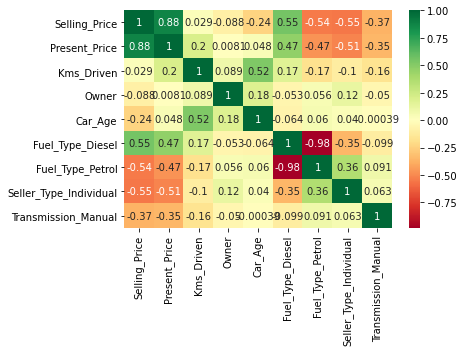

In [23]:
# Here heatmap is created using pearson correlation
g = sns.heatmap(final_Data[top_corr_features].corr(),annot=True,cmap="RdYlGn" )

In [24]:
#Pandas Profiling after Data preprocessing
profile= ProfileReport(final_Data,"Final Report",explorative= True, dark_mode=True)

In [25]:
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
# Independent and dependent features
X=final_Data.iloc[:,1:]
y=final_Data.iloc[:,0]

In [27]:
X.head()

Present_Price  Kms_Driven  Owner  Car_Age  Fuel_Type_Diesel  \
0           5.59       27000      0        7                 0   
1           9.54       43000      0        8                 1   
2           9.85        6900      0        4                 0   
3           4.15        5200      0       10                 0   
4           6.87       42450      0        7                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

In [28]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [29]:
# Now we will do feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=  ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [30]:
print(model.feature_importances_)

[0.38184377 0.04035464 0.00088997 0.07537275 0.21965937 0.01309294
 0.128615   0.14017155]


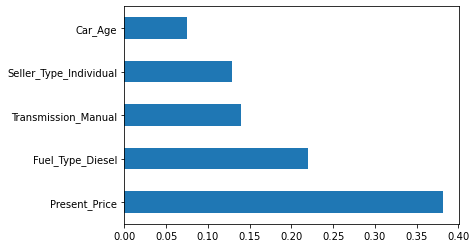

In [31]:
# plot graph for feature importance
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [33]:
# Apply randomforest regressor with hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
rf_random= RandomForestRegressor()

In [34]:
###Hyperparameteres
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [35]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
rf = RandomForestRegressor()

In [39]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [40]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [42]:
rf= RandomForestRegressor(n_estimators= 1000,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 25)

In [43]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [44]:
y_pred = rf.predict(X_test)

In [45]:
from sklearn import metrics

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.8400414285714347
MSE: 1.9907216092824422
RMSE: 1.4109293424131637


C:\Users\rkpla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

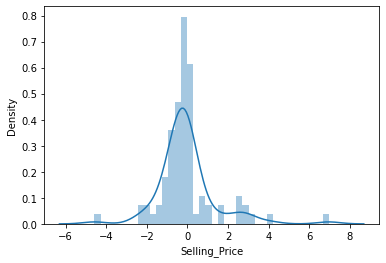

In [47]:
sns.distplot(y_test-y_pred)

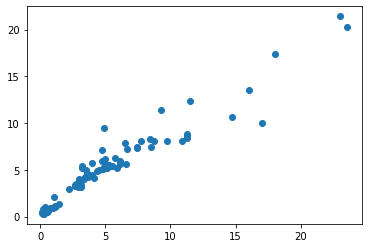

In [48]:
plt.scatter(y_test,y_pred)

In [49]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model_1.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X,y)

StandardScaler()

In [51]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [52]:
from sklearn.linear_model import LinearRegression
Lin_reg= LinearRegression()

In [53]:
Lin_reg.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred = Lin_reg.predict(X_test)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.3191299233658653
MSE: 4.966217857614898
RMSE: 2.2285012581586976


C:\Users\rkpla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

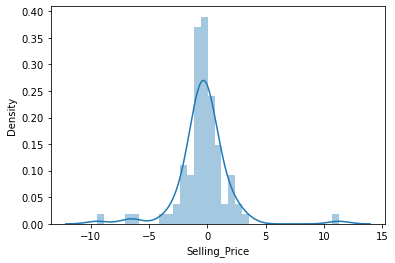

In [56]:
sns.distplot(y_test-y_pred)

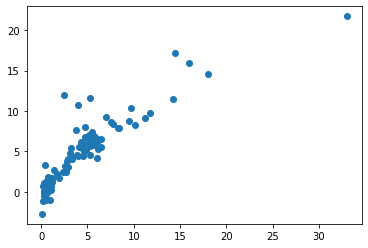

In [57]:
plt.scatter(y_test,y_pred)